<a href="https://colab.research.google.com/github/Chukwugude/Machine-Learning-projects/blob/main/Bank_telemarketing_campaign_Oeson_Pre_processing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

>#### This is a case study on Bank marketing campaign targeted at understanding exploatory data analysis and data pre-processing. The bank conducted a telemarketing campaign for one of its products - term deposit. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


##Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the dataset

In [3]:
#reading the data
f = pd.read_csv('Bank Telemarketing - Oeson.csv')

<ipython-input-3-88a7dda40afc>:2: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  f = pd.read_csv('Bank Telemarketing - Oeson.csv')


In [4]:
#Print the head of the data frame
f.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [5]:
# Checking the last 5 rows
f.tail()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no
45212,45211,37.0,120000,2971,married,"entrepreneur,secondary",yes,no,no,no,cellular,17,"nov, 2017",6.01666666666667 min,2,188,11,other,no


In [6]:
# Read the file without the first two rows
df = pd.read_csv('Bank Telemarketing - Oeson.csv', skiprows=2)

In [7]:
# Print the head of the data frame
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [8]:
#print the shape of dataframe
df.shape

(45211, 19)

In [9]:
# Print the information of variables to check their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [10]:
# Getting the missing values of age
missing_age = df['age'].isna().sum()
missing_age

20

##Data cleaning

In [11]:
# convert the age variable data type from float to integer
# First by handling missing values by filling with the median
df['age'].fillna(df['age'].median(), inplace=True)
df['age'] = df['age'].astype(int)


In [12]:
# Verifying that age variable has been converted to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   salary      45211 non-null  int64 
 3   balance     45211 non-null  int64 
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  int64 
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  int64 
 15  pdays       45211 non-null  int64 
 16  previous    45211 non-null  int64 
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [13]:
# Calculate the average age
average_age = df['age'].mean()
average_age

40.934794629625536

### Dropping customer id column

In [14]:
# drop the customer id as it is of no use
df.drop(columns=['customerid'], inplace=True)

In [15]:
# Split the 'jobedu' column into 'job' and 'education' columns
df[['job', 'education']] = df['jobedu'].str.split(',', expand=True)

# Drop the original 'jobedu' column
df.drop(columns=['jobedu'], inplace=True)

# Display the DataFrame to verify the changes
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
salary,100000,60000,120000,20000,0
balance,2143,29,2,1506,1
marital,married,single,married,married,single
targeted,yes,yes,yes,no,no
default,no,no,no,no,no
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


### Input/Remove missing values

In [16]:
# count the missing values in age column
missing_values_count_age = df['age'].isna().sum()
missing_values_count_age

0

In [17]:
# Total values count for month variable
total_values_count_month = df['month'].count()
total_values_count_month

45161

In [18]:
#count the missing values in month column
missing_values_count_month = df['month'].isna().sum()
missing_values_count_month


50

In [19]:
#calculate the percentage of missing values in month column

percentage_missing_values_month = (missing_values_count_month / total_values_count_month) * 100
percentage_missing_values_month

0.11071499745355505

In [20]:
# # Calculate the mode of the 'month' column
mode_month = df['month'].mode()[0]
mode_month

'may, 2017'

In [21]:
# Fill missing values in the 'month' column with the mode value
df['month'].fillna(mode_month, inplace=True)

In [22]:
# the null values in the month column.
missing_values_month = df['month'].isna().sum()
missing_values_month

0

### handling missing values in response variable column

In [23]:
#count the missing values in response column
missing_values_count_response = df['response'].isna().sum()
missing_values_count_response

30

In [24]:
# Total values count for month variable
total_values_count_response = df['response'].count()
total_values_count_response

45181

In [25]:
#calculate the percentage of missing values in response column
percentage_missing_values_response = (missing_values_count_response / total_values_count_response) * 100
percentage_missing_values_response

0.06639959274916447

In [26]:
# Drop rows where 'response' column has missing values
df.dropna(subset=['response'], inplace=True)
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [27]:
missing_values_response = df['response'].isna().sum()
missing_values_response

0

In [28]:
# Calculate the number of missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values in each column
print(missing_values)

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64


In [29]:
# describe the pdays columnn or get the statistical summary of the 'pdays' column
pdays_summary = df['pdays'].describe()

# Print the summary
print(pdays_summary)

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [30]:
# Replace -1 with NaN in the 'pdays' column
df['pdays'].replace(-1, np.nan, inplace=True)


In [31]:
# Get the statistical summary of the 'pdays' column after replacement
pdays_summary = df['pdays'].describe()

In [32]:
pdays_summary

count    8251.000000
mean      224.596170
std       115.352191
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Handling Outliers

In [33]:
# Get the statistical summary of the 'age' column
age_summary = df['age'].describe()
age_summary

count    45181.000000
mean        40.934906
std         10.616517
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

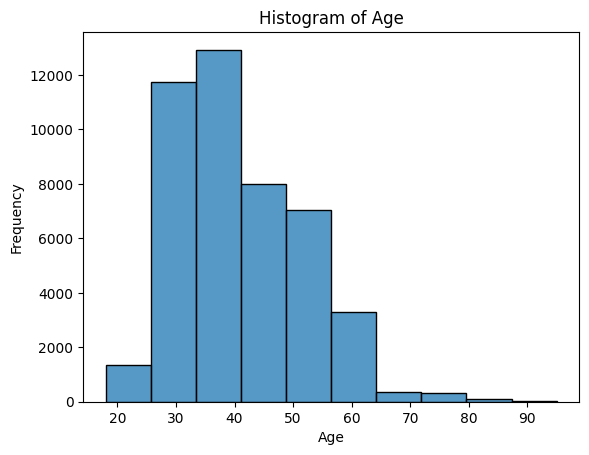

In [34]:
# Plot the histogram of the 'age' column using seaborn
sns.histplot(df['age'], bins=10, kde=False, edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

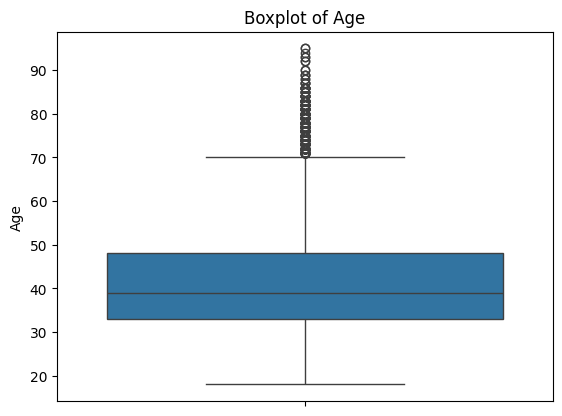

In [35]:
# Plot the boxplot of the 'age' column using seaborn
sns.boxplot(y=df['age'])

# Adding titles and labels
plt.title('Boxplot of Age')
plt.ylabel('Age')

# Show the plot
plt.show()

In [36]:
#describe the salary variable
salary_summary = df['salary'].describe()
salary_summary

count     45181.000000
mean      57005.046369
std       32089.163369
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

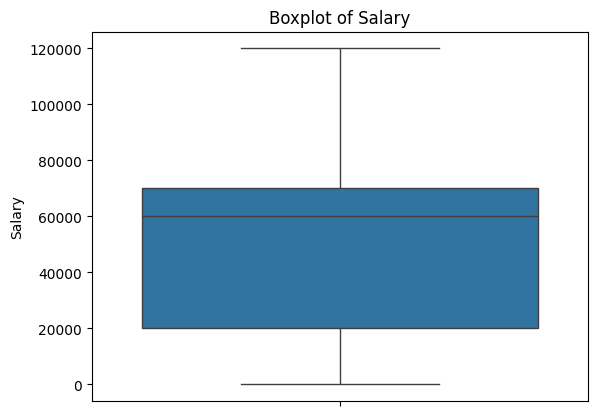

In [37]:
# Plot the boxplot of the 'salary' column using seaborn
sns.boxplot(y=df['salary'])

# Adding titles and labels
plt.title('Boxplot of Salary')
plt.ylabel('Salary')

# Show the plot
plt.show()

In [38]:
#describe the Balance variable
balance_summary = df['balance'].describe()
balance_summary

count     45181.000000
mean       1362.689936
std        3045.584521
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

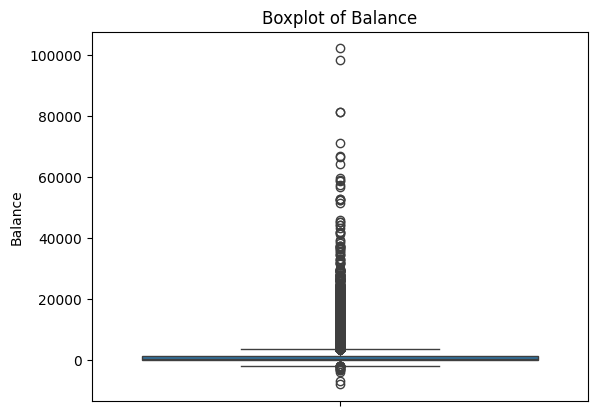

In [39]:
# Plot the boxplot of the 'balance' column using seaborn
sns.boxplot(y=df['balance'])
# Adding titles and labels
plt.title('Boxplot of Balance')
plt.ylabel('Balance')

# Show the plot
plt.show()

In [40]:
# Define the quantiles you want to calculate
quantiles = [0.5, 0.7, 0.9, 0.95, 0.99]

In [41]:
# Calculate the quantiles
balance_quantiles = df['balance'].quantile(quantiles)
balance_quantiles

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5769.0
0.99    13169.2
Name: balance, dtype: float64

### Standardising values

In [42]:
# describe the duration variable
duration_summary = df['duration'].describe()
duration_summary

count       45181
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [43]:
# Function to convert duration to minutes
def convert_to_minutes(duration):
    if 'sec' in duration:
        # Extract the numeric part and convert seconds to minutes
        seconds = float(duration.replace(' sec', ''))
        minutes = seconds / 60
    elif 'min' in duration:
        # Extract the numeric part and keep it as minutes
        minutes = float(duration.replace(' min', ''))
    else:
        minutes = float(duration)  # Assume it is already in minutes if no suffix is found
    return minutes

# Apply the function to the 'duration' column
df['duration_minutes'] = df['duration'].apply(convert_to_minutes)

# Drop the original 'duration' column
df = df.drop(columns=['duration'])


In [44]:
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,response,job,education,duration_minutes
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",1,NaN,0,unknown,no,management,tertiary,4.350000
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",1,NaN,0,unknown,no,technician,secondary,2.516667
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1,NaN,0,unknown,no,entrepreneur,secondary,1.266667
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1,NaN,0,unknown,no,blue-collar,unknown,1.533333
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",1,NaN,0,unknown,no,unknown,unknown,3.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",3,NaN,0,unknown,yes,technician,tertiary,16.283333
45207,71,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",2,NaN,0,unknown,yes,retired,primary,7.600000
45208,72,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",5,184.0,3,success,yes,retired,secondary,18.783333
45209,57,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",4,NaN,0,unknown,no,blue-collar,secondary,8.466667


In [45]:
# describe the duration_minutes variable
duration_minutes_summary = df['duration_minutes'].describe()
duration_minutes_summary

count    45181.000000
mean         4.302462
std          4.292520
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration_minutes, dtype: float64

## Univariate Analysis

In [46]:
# Count the occurrences of marital category
marital_counts = df['marital'].value_counts()

# Calculate the percentage for each category
marital_percentages = (marital_counts / len(df)) * 100

# Display the percentages
print(marital_percentages)

marital
married     60.191231
single      28.290653
divorced    11.518116
Name: count, dtype: float64


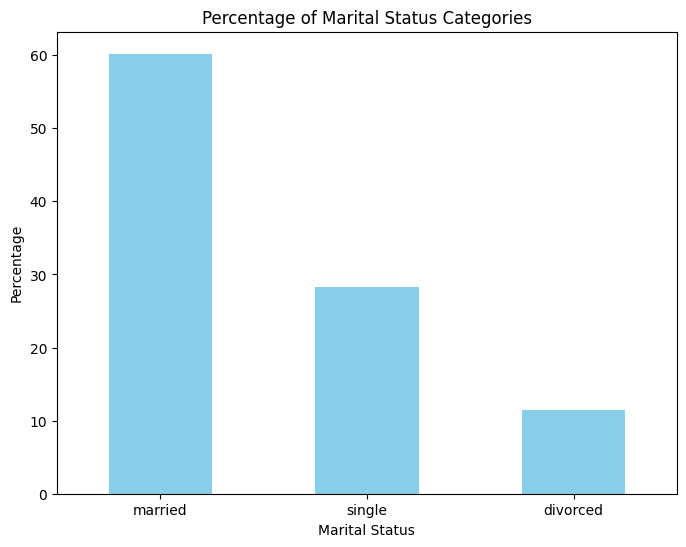

In [47]:
# Plot the bar graph
plt.figure(figsize=(8, 6))
marital_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Marital Status Categories')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them horizontal
plt.show()

In [48]:
# Calculate the percentage of each job category.

# Count the occurrences of job category
job_counts = df['job'].value_counts()

# Calculate the percentage for each category
job_percentages = (job_counts / len(df)) * 100

# Display the percentages
print(job_percentages)


job
blue-collar      21.528961
management       20.924725
technician       16.803524
admin.           11.434010
services          9.185277
retired           5.008743
self-employed     3.485979
entrepreneur      3.288993
unemployed        2.883956
housemaid         2.742303
student           2.076094
unknown           0.637436
Name: count, dtype: float64


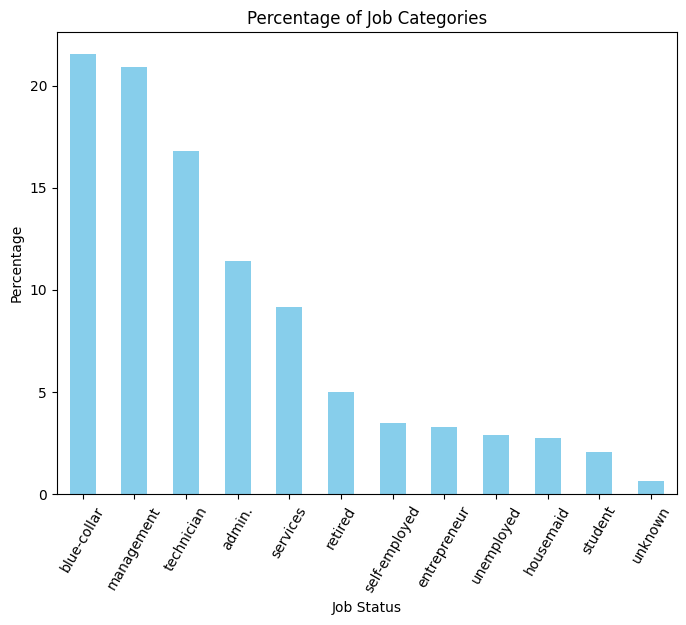

In [49]:
# Plot the bar graph
plt.figure(figsize=(8, 6))
job_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Job Categories')
plt.xlabel('Job Status')
plt.ylabel('Percentage')
plt.xticks(rotation=60)  # Rotate x-axis labels to make them horizontal
plt.show()

In [50]:
#calculate the percentage of each education category.

# Count the occurrences of job category
education_counts = df['job'].value_counts()

# Calculate the percentage for each category
job_percentages = (job_counts / len(df)) * 100

# Display the percentages
print(job_percentages)

job
blue-collar      21.528961
management       20.924725
technician       16.803524
admin.           11.434010
services          9.185277
retired           5.008743
self-employed     3.485979
entrepreneur      3.288993
unemployed        2.883956
housemaid         2.742303
student           2.076094
unknown           0.637436
Name: count, dtype: float64


In [51]:
# Count the occurrences of job category
education_counts = df['education'].value_counts()

# Calculate the percentage for each category
education_percentages = (education_counts / len(df)) * 100

# Display the percentages
print(education_percentages)

education
secondary    51.324672
tertiary     29.419446
primary      15.147960
unknown       4.107921
Name: count, dtype: float64


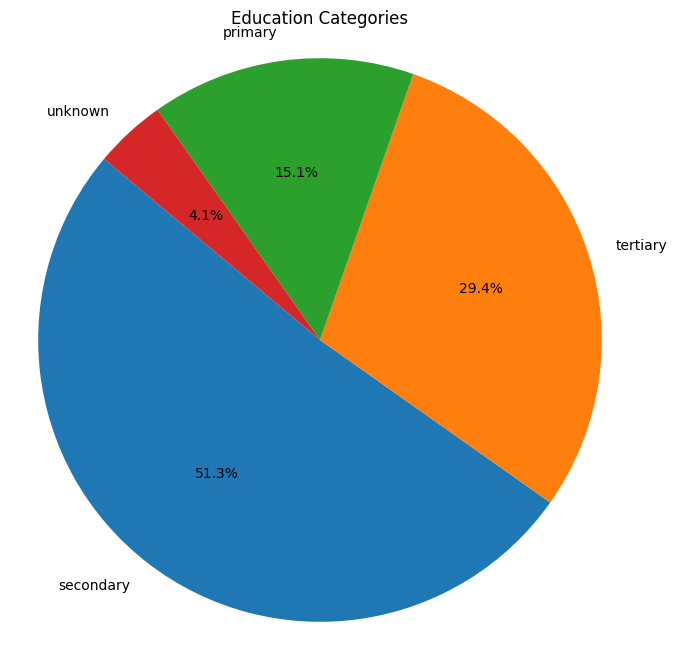

In [52]:
# Plot the pie chart
# Education levels and their corresponding percentages
education_categories = ['secondary', 'tertiary', 'primary', 'unknown']
percentages = [51.324672, 29.419446, 15.147960, 4.107921]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(percentages, labels=education_categories, autopct='%1.1f%%', startangle=140)
ax.set_title('Education Categories')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [53]:
#calculate the percentage of each poutcome category.


#####  Poutcome category.

In [54]:
# Count the occurrences of poutcome category
poutcome_counts = df['poutcome'].value_counts()

# Calculate the percentage for each category
poutcome_percentages = (poutcome_counts / len(df)) * 100

# Display the percentages
print(poutcome_percentages)

poutcome
unknown    81.748965
failure    10.838627
other       4.070295
success     3.342113
Name: count, dtype: float64


##### Response - the target variable

In [55]:
#calculate the percentage of each response category.
response_counts = df['response'].value_counts()

# Calculate the percentage for each category
response_percentages = (response_counts / len(df)) * 100

# Display the percentages
print(response_percentages)

response
no     88.298178
yes    11.701822
Name: count, dtype: float64


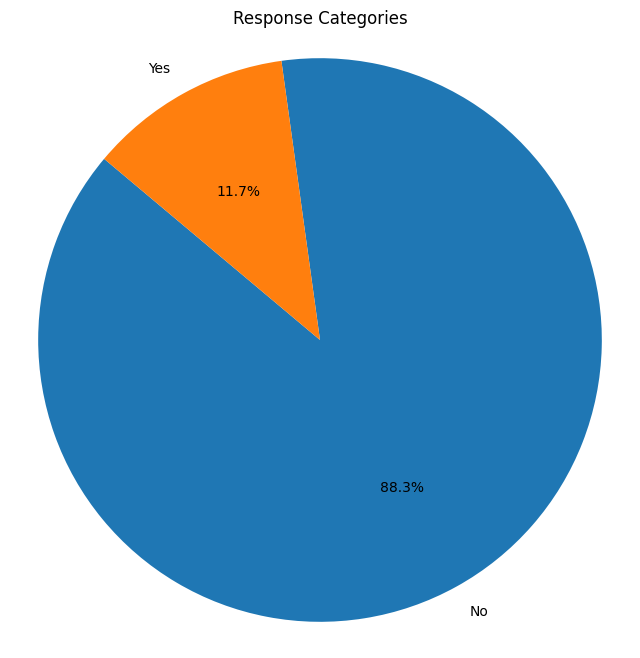

In [56]:
# Plot the pie chart
# Response and their corresponding percentages
response_categories = ['No', 'Yes']
percentages = [88.298178, 11.701822]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(percentages, labels=response_categories, autopct='%1.1f%%', startangle=140)
ax.set_title('Response Categories')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Bivariate Analysis

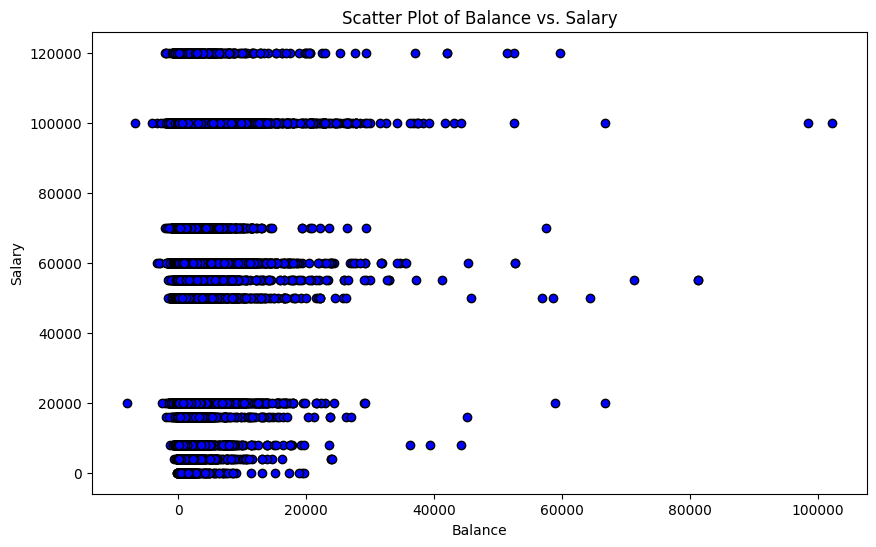

In [57]:
# Plotting the scatter plot of balance and salary variable
plt.figure(figsize=(10, 6))
plt.scatter(df['balance'], df['salary'], color='blue', edgecolor='k')

# Add titles and labels
plt.title('Scatter Plot of Balance vs. Salary')
plt.xlabel('Balance')
plt.ylabel('Salary')

# Show the plot
plt.show()

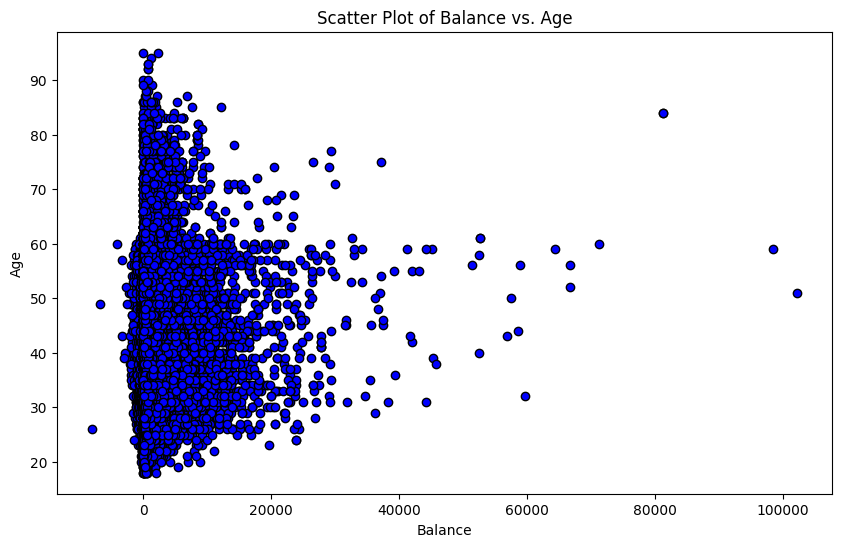

In [58]:
# Plot the scatter plot of balance and age variableS

plt.figure(figsize=(10, 6))
plt.scatter(df['balance'], df['age'], color='blue', edgecolor='k')

# Add titles and labels
plt.title('Scatter Plot of Balance vs. Age')
plt.xlabel('Balance')
plt.ylabel('Age')

# Show the plot
plt.show()

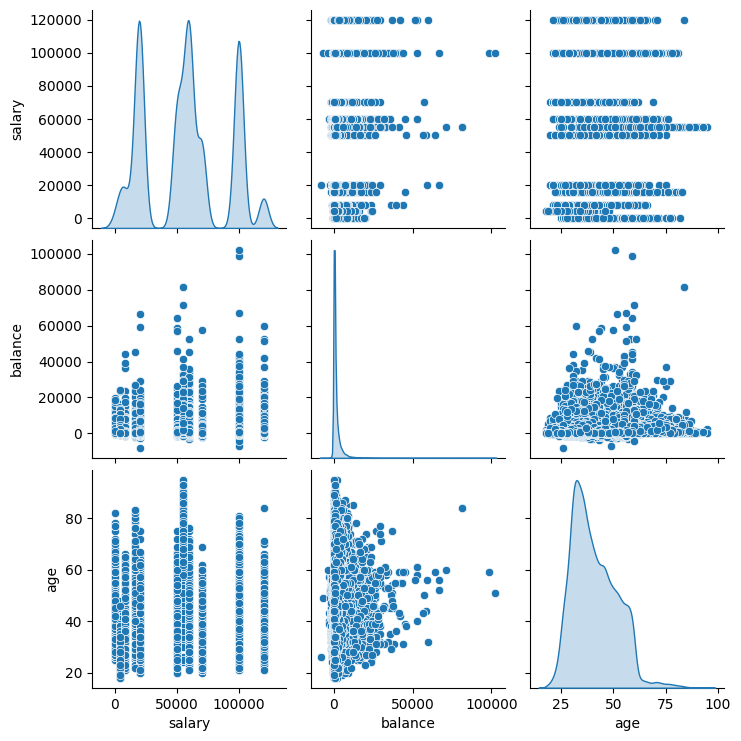

In [59]:
# Creating the pair plot for salary, balance, and age
sns.pairplot(df[['salary', 'balance', 'age']], diag_kind='kde')

# Show the plot
plt.show()

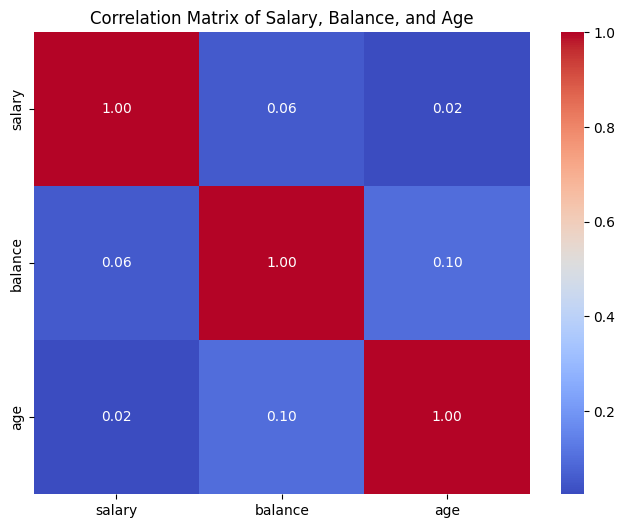

In [60]:
# Plot the correlation matrix of salary, balance and age

# Calculating the correlation matrix for salary, balance, and age
correlation_matrix = df[['salary', 'balance', 'age']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add titles and labels
plt.title('Correlation Matrix of Salary, Balance, and Age')
plt.show()

In [61]:
# Grouping by response and calculating the mean salary for each group
mean_salary_by_response = df.groupby('response')['salary'].mean()

print("Mean salary for response 'no':", mean_salary_by_response['no'])
print("Mean salary for response 'yes':", mean_salary_by_response['yes'])

Mean salary for response 'no': 56770.91793252118
Mean salary for response 'yes': 58771.704180064306


In [62]:
# Grouping by response and calculating the median salary for each group
median_salary_by_response = df.groupby('response')['salary'].median()

print("Median salary for response 'no':", median_salary_by_response['no'])
print("Median salary for response 'yes':", median_salary_by_response['yes'])

Median salary for response 'no': 60000.0
Median salary for response 'yes': 60000.0


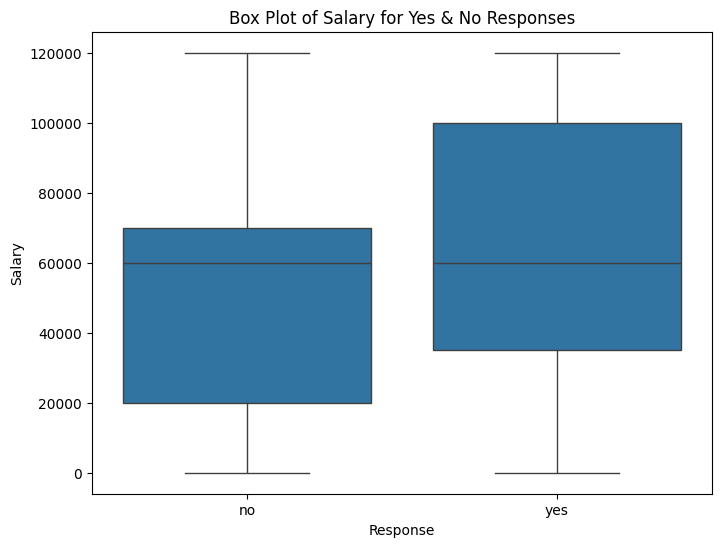

In [63]:
# Plotting the box plot of salary for 'yes' and 'no' responses
plt.figure(figsize=(8, 6))
sns.boxplot(x='response', y='salary', data=df)

# Adding titles and labels
plt.title('Box Plot of Salary for Yes & No Responses')
plt.xlabel('Response')
plt.ylabel('Salary')

# Show the plot
plt.show()

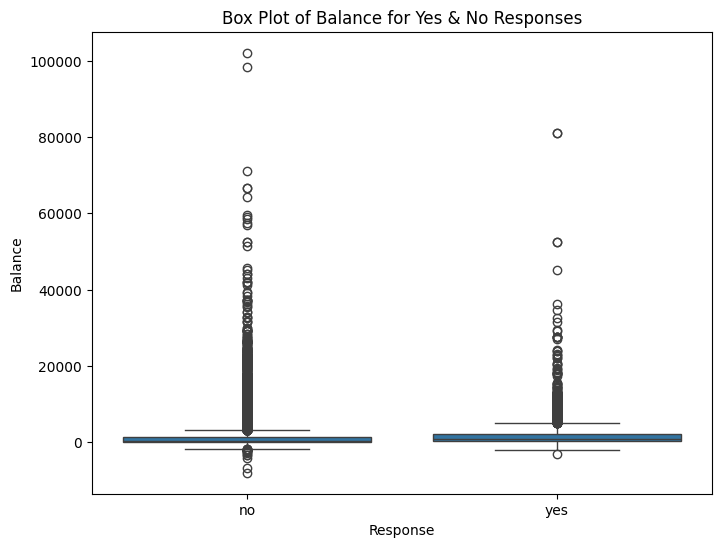

In [64]:
# Plotting the box plot of balance for 'yes' and 'no' responses
plt.figure(figsize=(8, 6))
sns.boxplot(x='response', y='balance', data=df)

# Adding titles and labels
plt.title('Box Plot of Balance for Yes & No Responses')
plt.xlabel('Response')
plt.ylabel('Balance')

# Show the plot
plt.show()

In [65]:
# Grouping by response and calculating the mean balance for each group
mean_balance_by_response = df.groupby('response')['balance'].mean()

print("Mean balance for response 'no':", mean_balance_by_response['no'])
print("Mean balance for response 'yes':", mean_balance_by_response['yes'])

Mean balance for response 'no': 1304.0945254925552
Mean balance for response 'yes': 1804.832040854927


In [66]:
# Grouping by response and calculating the median balance for each group
median_balance_by_response = df.groupby('response')['balance'].median()

print("Median balance for response 'no':", median_balance_by_response['no'])
print("Median balance for response 'yes':", median_balance_by_response['yes'])

Median balance for response 'no': 417.0
Median balance for response 'yes': 733.0


###75th percentile

In [67]:
# Defining the function to calculate the 75th percentile
def p75(x):
    return x.quantile(0.75)

# Grouping by response and calculating the mean, median, and 75th percentile of balance for each group
result = df.groupby('response')['balance'].agg(['mean', 'median', p75])

print("Statistics of balance for response 'no':")
print(result.loc['no'])

print("\nStatistics of balance for response 'yes':")
print(result.loc['yes'])

Statistics of balance for response 'no':
mean      1304.094525
median     417.000000
p75       1345.000000
Name: no, dtype: float64

Statistics of balance for response 'yes':
mean      1804.832041
median     733.000000
p75       2159.500000
Name: yes, dtype: float64


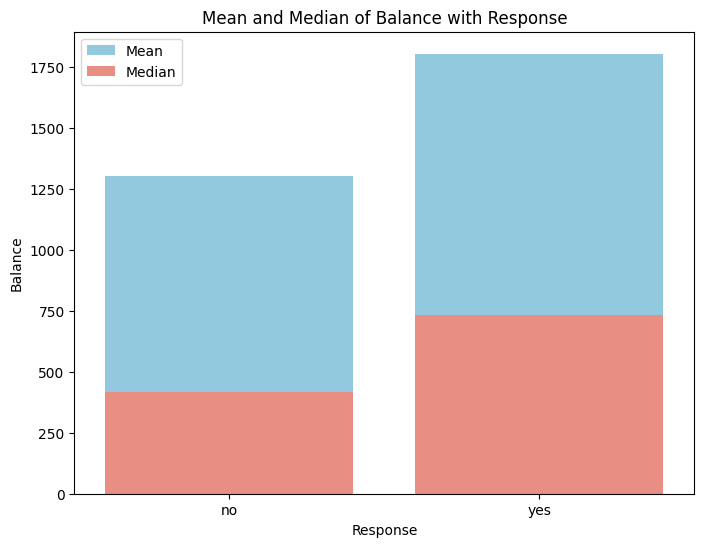

In [68]:
# Grouping by response and calculating the mean and median of balance for each group
stats = df.groupby('response')['balance'].agg(['mean', 'median']).reset_index()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='response', y='mean', data=stats, color='skyblue', label='Mean')
sns.barplot(x='response', y='median', data=stats, color='salmon', label='Median')

# Adding titles and labels
plt.title('Mean and Median of Balance with Response')
plt.xlabel('Response')
plt.ylabel('Balance')
plt.legend()

# Show the plot
plt.show()


### Education vs salary

In [69]:
# Grouping by education and calculating the mean salary for each group
mean_salary_by_education = df.groupby('education')['salary'].mean()

print("Mean salary for each education category:")
print(mean_salary_by_education)

Mean salary for each education category:
education
primary      34220.192870
secondary    49739.143559
tertiary     82875.564249
unknown      46529.633621
Name: salary, dtype: float64


In [70]:
# Grouping by education and calculating the median salary for each group
median_salary_by_education = df.groupby('education')['salary'].median()

print("Median salary for each education category:")
print(median_salary_by_education)

Median salary for each education category:
education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64


### Job vs salary

In [71]:
# Grouping by job and calculating the mean salary for each group
mean_salary_by_job = df.groupby('job')['salary'].mean()

print("Mean salary for each job category:")
print(mean_salary_by_job)

Mean salary for each job category:
job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64


### Categorical variable

In [72]:
# Creating the response_flag column
df['response_flag'] = df['response'].map({'yes': 1, 'no': 0})

print(df[['response', 'response_flag']])

      response  response_flag
0           no              0
1           no              0
2           no              0
3           no              0
4           no              0
...        ...            ...
45206      yes              1
45207      yes              1
45208      yes              1
45209       no              0
45210       no              0

[45181 rows x 2 columns]


### Education vs response rate

In [73]:
#calculate the mean of response_flag with different education categories

# Grouping by education and calculating the mean of response_flag for each group
mean_response_flag_by_education = df.groupby('education')['response_flag'].mean()

print("Mean of response_flag for each education category:")
print(mean_response_flag_by_education)

Mean of response_flag for each education category:
education
primary      0.086353
secondary    0.105610
tertiary     0.150090
unknown      0.135776
Name: response_flag, dtype: float64


### Marital vs response rate

In [76]:
#calculate the mean of response_flag with different marital status categories.

# Grouping by marital status and calculating the mean of response_flag for each group
mean_response_flag_by_marital = df.groupby('marital')['response_flag'].mean()

print("Mean of response_flag for each marital status category:")
print(mean_response_flag_by_marital)

Mean of response_flag for each marital status category:
marital
divorced    0.119523
married     0.101269
single      0.149507
Name: response_flag, dtype: float64


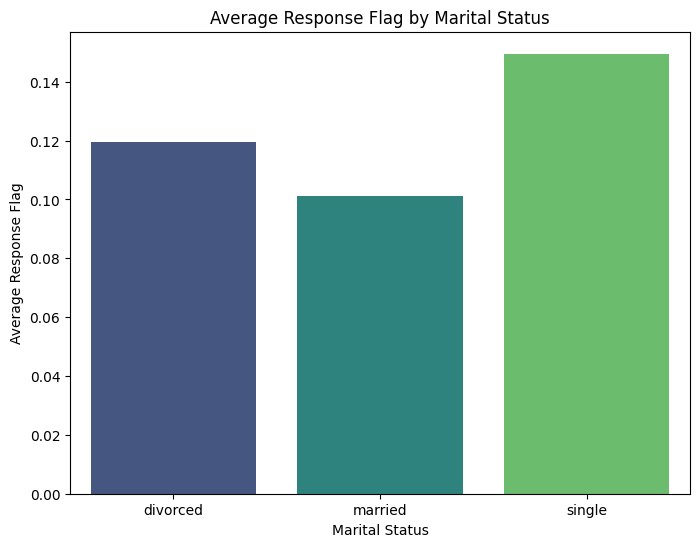

In [83]:
#plot the bar graph of marital status with average value of response_flag

# Creating the response_flag column
df['response_flag'] = df['response'].map({'yes': 1, 'no': 0})

# Grouping by marital status and calculating the mean of response_flag for each group
mean_response_flag_by_marital = df.groupby('marital')['response_flag'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='marital', y='response_flag', data=mean_response_flag_by_marital, palette='viridis', hue='marital', dodge=False)

# Adding titles and labels
plt.title('Average Response Flag by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Response Flag')

# Removing the legend since we are using colors just for different bars
plt.legend().set_visible(False)

# Showing the plot
plt.show()

### Loan vs response rate

<ipython-input-84-479c143702c8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loan', y='response_flag', data=mean_response_flag_by_loan, palette='viridis')


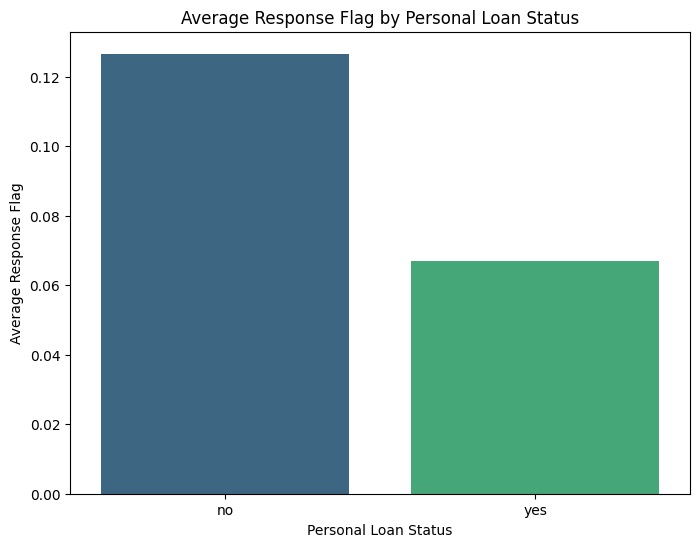

In [84]:
# Grouping by loan status and calculating the mean of response_flag for each group
mean_response_flag_by_loan = df.groupby('loan')['response_flag'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='loan', y='response_flag', data=mean_response_flag_by_loan, palette='viridis')

# Adding titles and labels
plt.title('Average Response Flag by Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Average Response Flag')

# Showing the plot
plt.show()

### Housing loans vs response rate

<ipython-input-86-11036a8b1035>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='housing', y='response_flag', data=mean_response_flag_by_housing, palette='viridis')


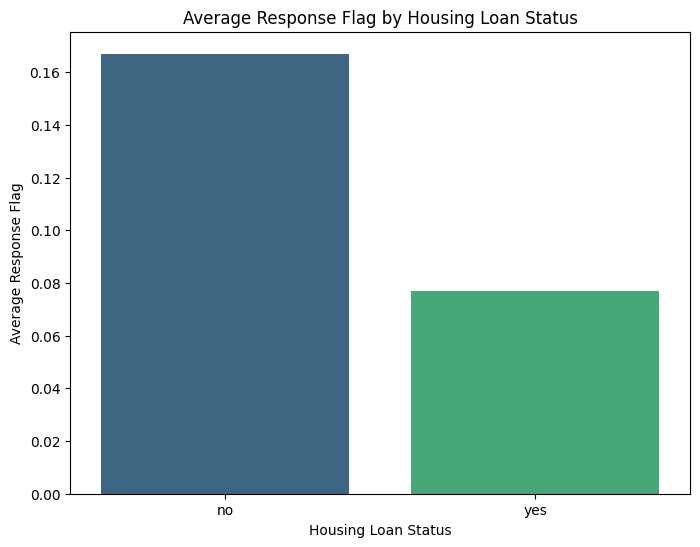

In [86]:
# Creating the response_flag column
df['response_flag'] = df['response'].map({'yes': 1, 'no': 0})

# Grouping by housing loan status and calculating the mean of response_flag for each group
mean_response_flag_by_housing = df.groupby('housing')['response_flag'].mean().reset_index()
# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='housing', y='response_flag', data=mean_response_flag_by_housing, palette='viridis')

# Adding titles and labels
plt.title('Average Response Flag by Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Average Response Flag')

# Showing the plot
plt.show()


### Age vs response

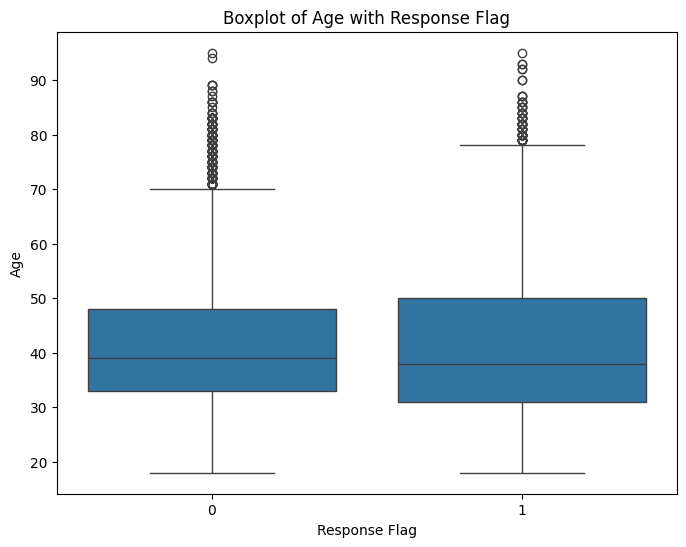

In [87]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='response_flag', y='age', data=df)

# Adding titles and labels
plt.title('Boxplot of Age with Response Flag')
plt.xlabel('Response Flag')
plt.ylabel('Age')

# Showing the plot
plt.show()

In [89]:
# Define the bins and labels
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['<30', '30-40', '40-50', '50-60', '60+']

# Create the age_bucket column
df['age_bucket'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Display the DataFrame
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,response,job,education,duration_minutes,response_flag,age_bucket
0,58,100000,2143,married,yes,no,yes,no,unknown,5,...,1,NaN,0,unknown,no,management,tertiary,4.350000,0,50-60
1,44,60000,29,single,yes,no,yes,no,unknown,5,...,1,NaN,0,unknown,no,technician,secondary,2.516667,0,40-50
2,33,120000,2,married,yes,no,yes,yes,unknown,5,...,1,NaN,0,unknown,no,entrepreneur,secondary,1.266667,0,30-40
3,47,20000,1506,married,no,no,yes,no,unknown,5,...,1,NaN,0,unknown,no,blue-collar,unknown,1.533333,0,40-50
4,33,0,1,single,no,no,no,no,unknown,5,...,1,NaN,0,unknown,no,unknown,unknown,3.300000,0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,married,yes,no,no,no,cellular,17,...,3,NaN,0,unknown,yes,technician,tertiary,16.283333,1,50-60
45207,71,55000,1729,divorced,yes,no,no,no,cellular,17,...,2,NaN,0,unknown,yes,retired,primary,7.600000,1,60+
45208,72,55000,5715,married,yes,no,no,no,cellular,17,...,5,184.0,3,success,yes,retired,secondary,18.783333,1,60+
45209,57,20000,668,married,yes,no,no,no,telephone,17,...,4,NaN,0,unknown,no,blue-collar,secondary,8.466667,0,50-60


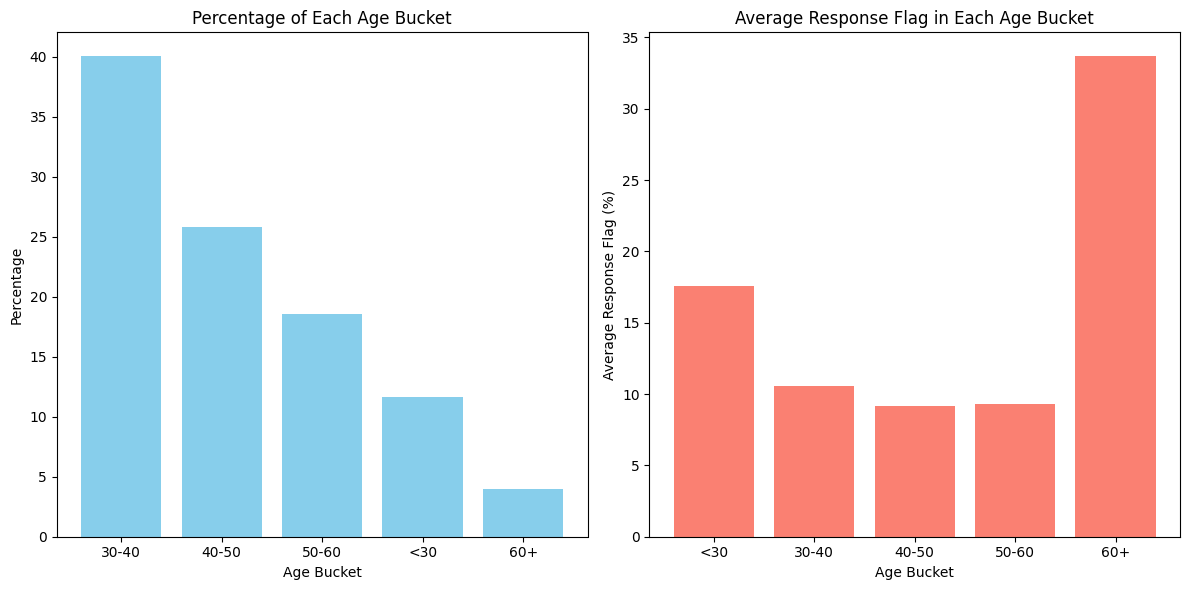

In [90]:
# Group by age_bucket and calculate percentages
age_bucket_counts = df['age_bucket'].value_counts(normalize=True) * 100

# Group by age_bucket and calculate average response_flag
age_bucket_response_flag = df.groupby('age_bucket')['response_flag'].mean() * 100

# Plotting subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting percentage of each age bucket
axs[0].bar(age_bucket_counts.index, age_bucket_counts.values, color='skyblue')
axs[0].set_title('Percentage of Each Age Bucket')
axs[0].set_xlabel('Age Bucket')
axs[0].set_ylabel('Percentage')

# Plotting average values of response_flag in each age bucket
axs[1].bar(age_bucket_response_flag.index, age_bucket_response_flag.values, color='salmon')
axs[1].set_title('Average Response Flag in Each Age Bucket')
axs[1].set_xlabel('Age Bucket')
axs[1].set_ylabel('Average Response Flag (%)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

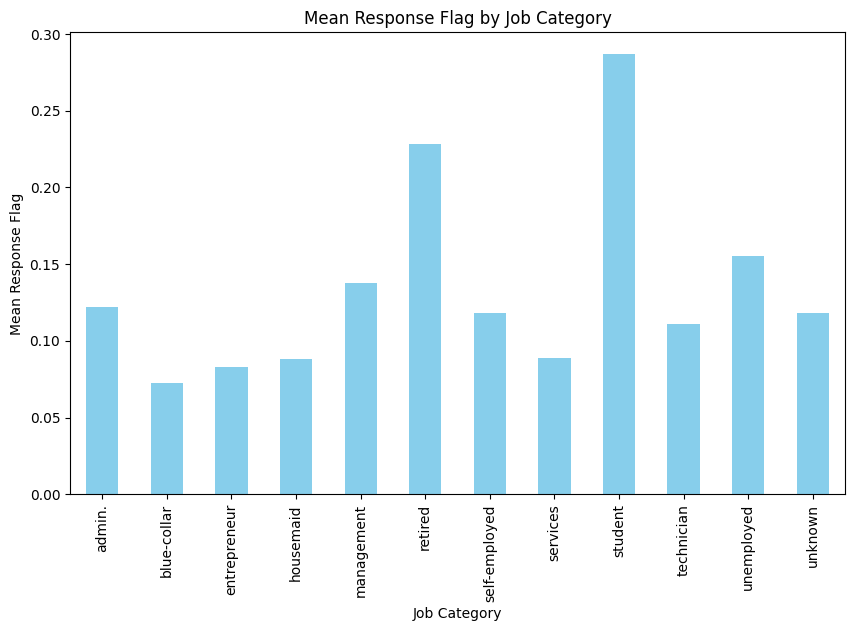

In [91]:
# Group by job and calculate the mean of response_flag
job_response_mean = df.groupby('job')['response_flag'].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
job_response_mean.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Mean Response Flag by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Mean Response Flag')

# Showing the plot
plt.show()

# Multivariate Analysis

### Education vs marital vs response

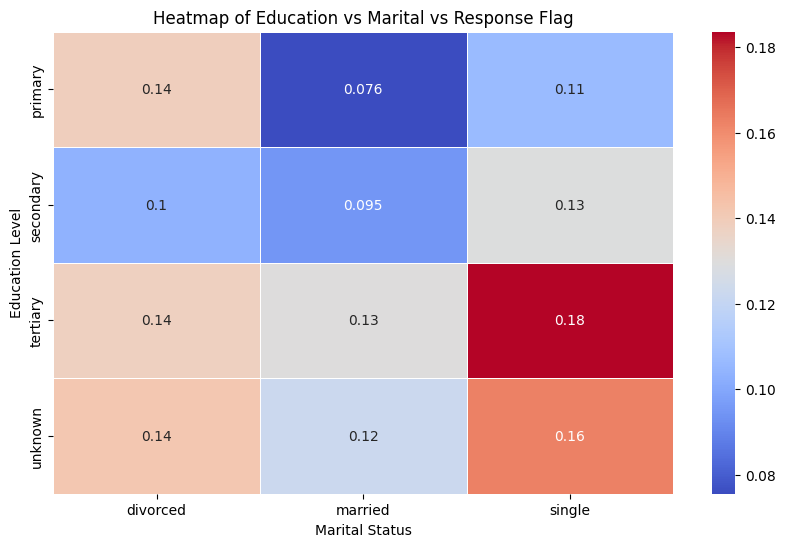

In [92]:
#create heat map of education vs marital vs response_flag

# Create a pivot table with education and marital as index and response_flag as values
pivot_table = df.pivot_table(index='education', columns='marital', values='response_flag', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding titles and labels
plt.title('Heatmap of Education vs Marital vs Response Flag')
plt.xlabel('Marital Status')
plt.ylabel('Education Level')

# Showing the plot
plt.show()



### Job vs marital vs response

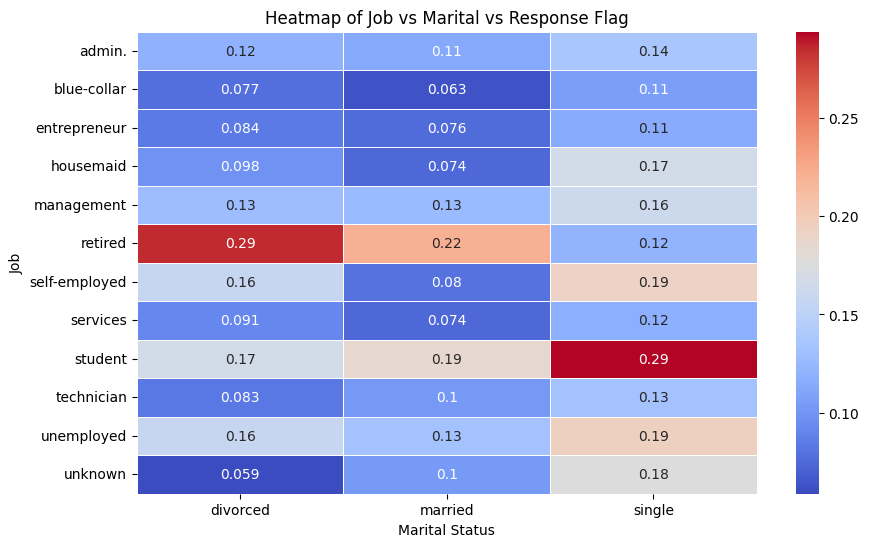

In [93]:
#create the heat map of Job vs marital vs response_flag

# Create a pivot table with job and marital as index and response_flag as values
pivot_table = df.pivot_table(index='job', columns='marital', values='response_flag', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding titles and labels
plt.title('Heatmap of Job vs Marital vs Response Flag')
plt.xlabel('Marital Status')
plt.ylabel('Job')

# Showing the plot
plt.show()


### Education vs poutcome vs response

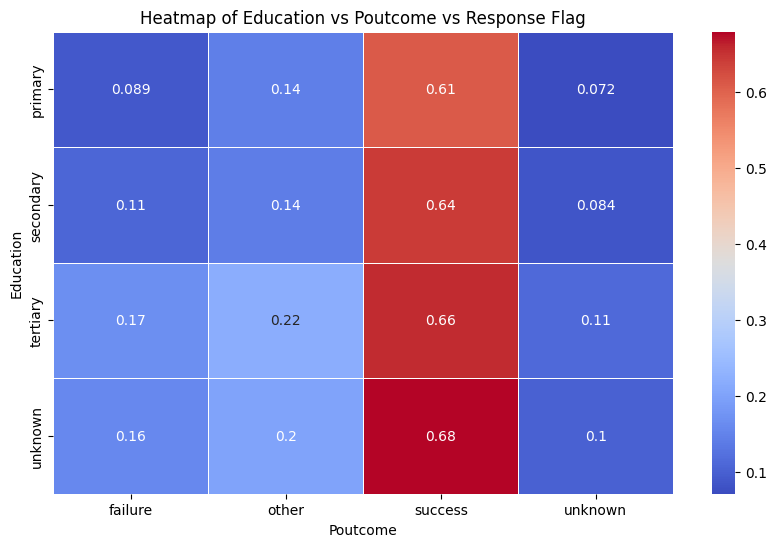

In [94]:
#create the heat map of education vs poutcome vs response_flag

# Create a pivot table with education and poutcome as index and response_flag as values
pivot_table = df.pivot_table(index='education', columns='poutcome', values='response_flag', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding titles and labels
plt.title('Heatmap of Education vs Poutcome vs Response Flag')
plt.xlabel('Poutcome')
plt.ylabel('Education')

# Showing the plot
plt.show()